In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(2)

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1


In [ ]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [ ]:
df.dropna(how = 'any',inplace = True)

In [ ]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [ ]:
df.describe()

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [ ]:
corr=df.corr()['y']
corr.abs().sort_values(ascending=False)[1:]

x1    0.120871
x2    0.026735
Name: y, dtype: float64

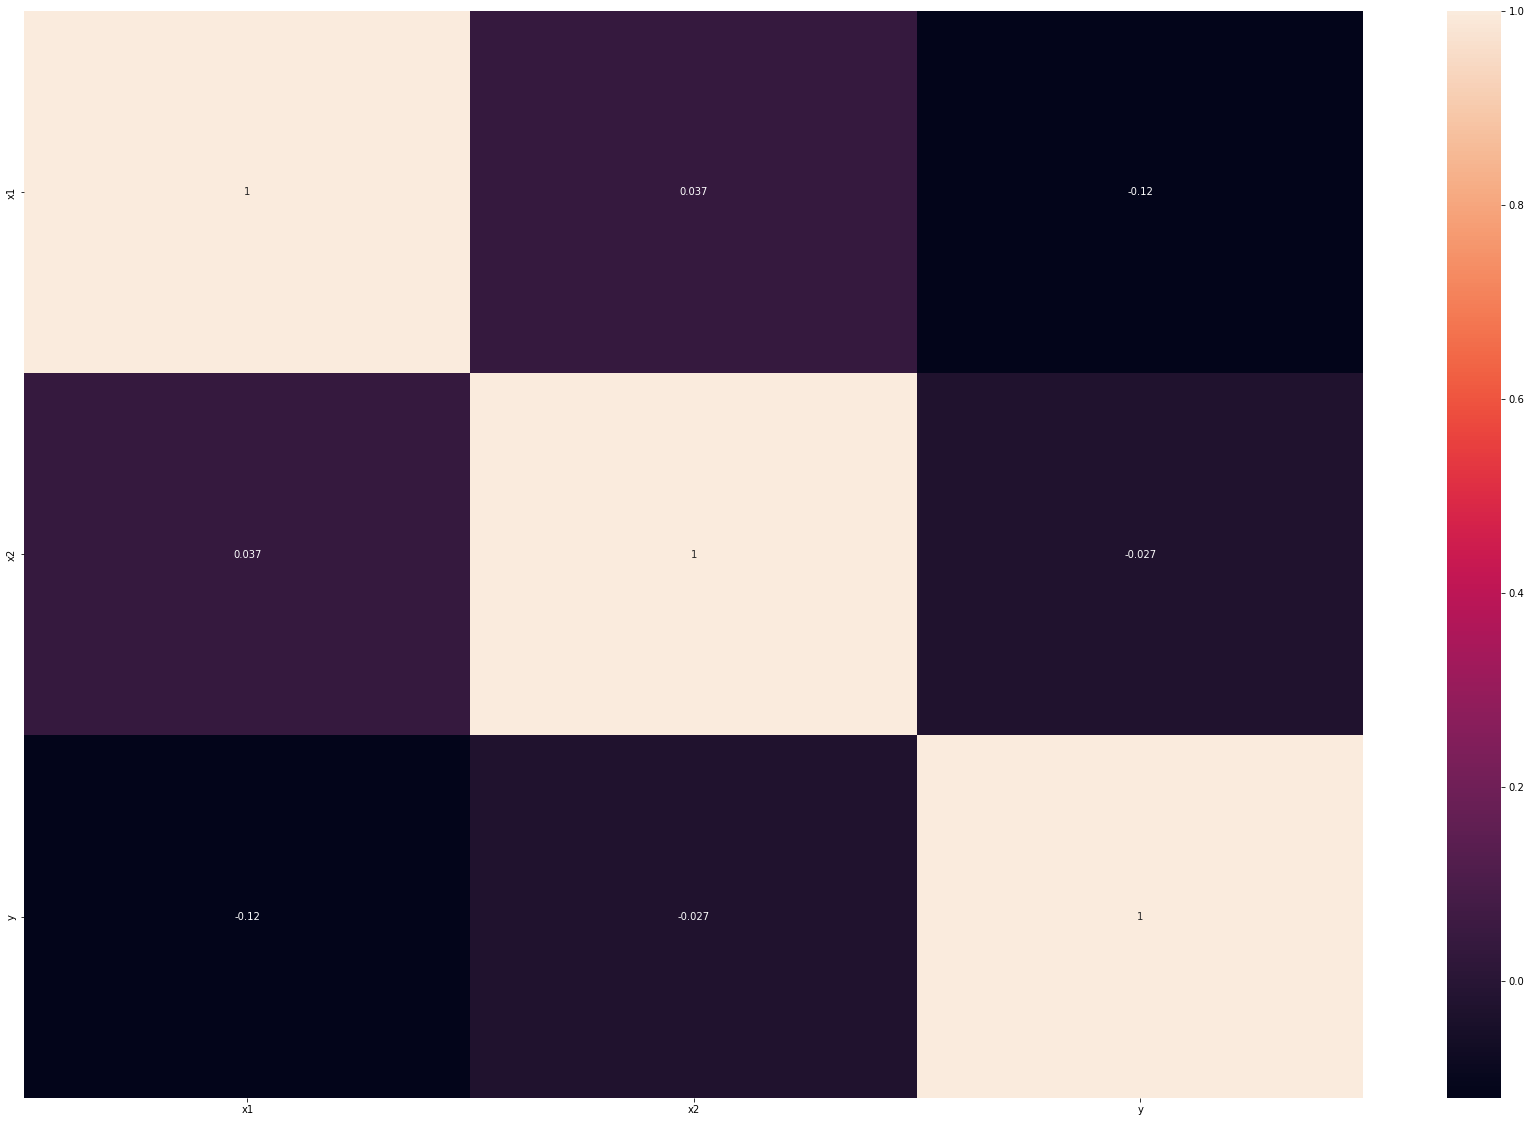

In [ ]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, ax=ax);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69102a1990>,
      dtype=object)

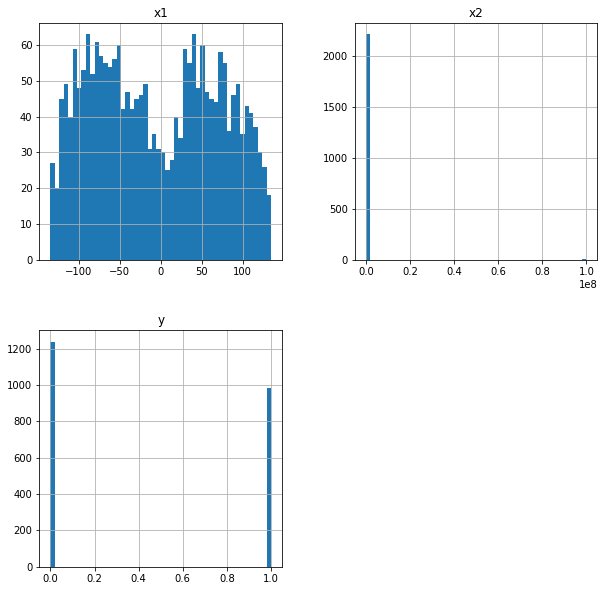

In [ ]:
df.hist(bins=50, figsize=(10,10))

In [ ]:
df.nunique()

x1    1884
x2    1879
y        2
dtype: int64

In [ ]:
df[df==0].count()

x1       0
x2       2
y     1238
dtype: int64

In [ ]:
from scipy import stats

In [ ]:
z = np.abs(stats.zscore(df))
print(z)

[[1.52953452e+00 2.99941733e-02 1.12337775e+00]
 [1.28583072e+00 2.99999411e-02 1.12337775e+00]
 [1.67518040e+00 2.99969302e-02 1.12337775e+00]
 ...
 [1.20720924e+00 2.99979109e-02 8.90172516e-01]
 [1.11758091e+00 3.00063617e-02 8.90172516e-01]
 [1.52687860e+00 3.34595047e+01 8.90172516e-01]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([1533, 2218]), array([1, 1]))


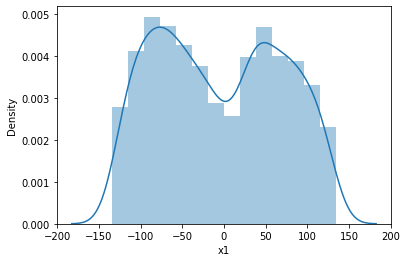

In [ ]:
sns.distplot(df['x1'])

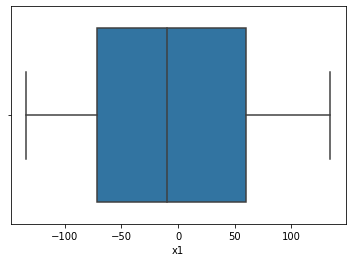

In [ ]:
sns.boxplot(df['x1'])

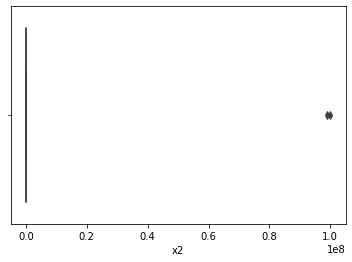

In [ ]:
sns.boxplot(df['x2'])

In [ ]:
Q1 = np.percentile(df['x2'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['x2'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

144.164140905

In [ ]:
outindex = (df['x2'] <= Q1 - 1.5 * IQR) & (df['x2'] >= Q3 + 1.5 *IQR)


In [ ]:
outindex.sum()

0

In [ ]:
Q1 = np.percentile(df['x1'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['x1'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

131.54450885

In [ ]:
outindex1 = (df['x1'] <= Q1 - 1.5 * IQR) & (df['x1'] >= Q3 + 1.5 *IQR)

In [ ]:
outindex1.sum()

0

In [ ]:
df1 = df.copy(deep=True)
df2 = df1.copy(deep=True)
df3 = df2.copy(deep=True)
df4 = df3.copy(deep=True)
df5 = df4.copy(deep=True)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x = df[['x1','x2']]
y = df[['y']]

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(x_test, y_test)

0.5968468468468469

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
lr.score(x_test, y_pred)

1.0

##DecisionTreeClassifier

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth = 11,random_state = 53)
dt = dt.fit(x_train,y_train)

In [ ]:
y_pred = dt.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[218  24]
 [  9 193]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       242
           1       0.89      0.96      0.92       202

    accuracy                           0.93       444
   macro avg       0.92      0.93      0.93       444
weighted avg       0.93      0.93      0.93       444



## SVC(LINEAR KERNAL)

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf =SVC(gamma='auto', kernel='linear')

In [ ]:
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.score(x_test,y_test)

0.545045045045045

##SVC (RBF KERNAL)

In [ ]:
cli =SVC(gamma ='auto', kernel='rbf')

In [ ]:
cli.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
cli.score(x_test,y_test)

0.5990990990990991

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = KNeighborsClassifier(n_neighbors=3,p=2)
k

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
k.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
print("Euclidian Distance Score")
k.score(x_test,y_test)

Euclidian Distance Score


0.5225225225225225

##logistic regression score 100%
##Dcision tree classifier score 96%
##SVM(linear kernal) score 54%
##SVN(rbf kernal) score 59%
##KNN classifier score 52% - knn generally search for nearest neighbour and form cluster so in our dataset data points were distibuted sparsly so knn is giving a low score